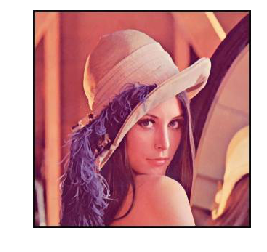

In [16]:
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('E:/Images/model.jpg')
show_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(show_img)
plt.axis("off")
plt.show()

OpenCV利用BGR方法进行图像读取

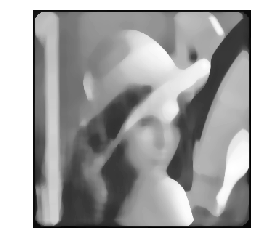

In [37]:
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('E:/Images/model.jpg')
grayImage = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_medianBlur = cv.medianBlur(grayImage, 17)
plt.imshow(img_medianBlur, cmap = "gray")
plt.axis("off")
plt.show()

中值滤波为7的时候

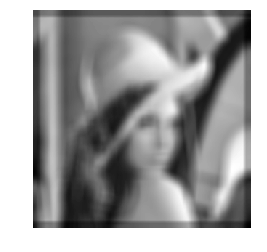

In [38]:
img_Blur = cv.blur(grayImage, (17,17))
plt.imshow(img_Blur, cmap = "gray")
plt.axis("off")
plt.show()

均值滤波为7的时候

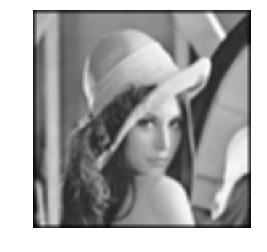

In [25]:
img_GaussianBlur = cv.GaussianBlur(grayImage, (7,7), 5)
plt.imshow(img_GaussianBlur, cmap = "gray")
plt.axis("off")
plt.show()

C++: void GaussianBlur(InputArray src, OutputArray dst, Size ksize, double sigmaX, double sigmaY=0, int borderType=BORDER_DEFAULT )
. double sigmaX: 高斯核函数在X方向上的标准偏差
. double sigmaY: 高斯核函数在Y方向上的标准偏差，如果sigmaY是0，则函数会自动将sigmaY的值设置为与sigmaX相同的值，如果sigmaX和sigmaY都是0，这两个值将由ksize.width和ksize.height计算而来。具体可以参考getGaussianKernel()函数查看具体细节。建议将size、sigmaX和sigmaY都指定出来。
. int borderType=BORDER_DEFAULT: 推断图像外部像素的某种便捷模式，有默认值BORDER_DEFAULT，如果没有特殊需要不用更改，具体可以参考borderInterpolate()函数。
评价:该sigma值越大，结果越接近均值滤波。

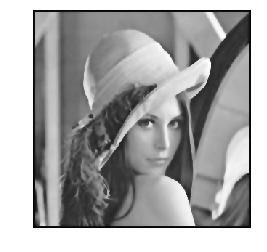

In [32]:
bilateralImage = cv.bilateralFilter(src=grayImage, d=0, sigmaColor=50, sigmaSpace=2)
plt.imshow(bilateralImage, cmap = "gray")
plt.axis("off")
plt.show()

其中各参数所表达的意义：
    src：原图像；
    d：像素的邻域直径，可有sigmaColor和sigmaSpace计算可得；
    sigmaColor：颜色空间的标准方差，一般尽可能大；
    sigmaSpace：坐标空间的标准方差(像素单位)，一般尽可能小。

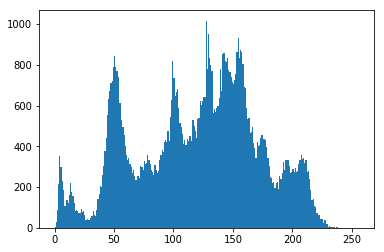

In [39]:
plt.hist(grayImage.ravel() , 256, [0, 256])
plt.show()

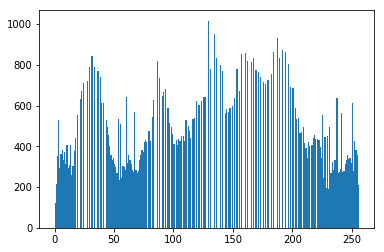

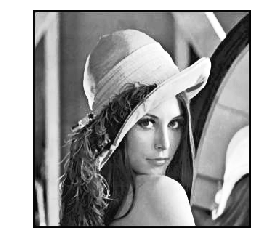

In [41]:
equ = cv.equalizeHist(grayImage)
plt.hist(equ.ravel() , 256, [0, 256])
plt.show()

plt.imshow(equ, cmap = "gray")
plt.axis("off")
plt.show()

第一步：依次扫描原始灰度图像的每一个像素，计算出图像的直方图H
第二步：进行归一化处理，即将0~255像素值的每一个像素值在图像中出现的次数除以图像的大小，得到归一化直方图。
第三步：计算直方图积分，公式：这里写图片描述
https://blog.csdn.net/qq_29441995/article/details/52503675 有解释
第四步：以H’作为查询表进行图像变换dst(x,y)=H’(src(x,y))

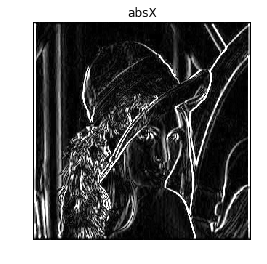

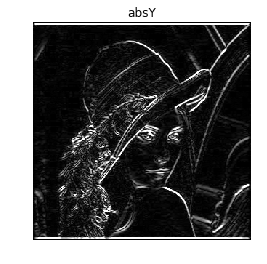

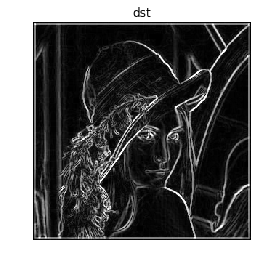

In [47]:
x = cv.Sobel(grayImage,cv.CV_16S,1,0)  
y = cv.Sobel(grayImage,cv.CV_16S,0,1)  
  
absX = cv.convertScaleAbs(x)   # 转回uint8  
absY = cv.convertScaleAbs(y) 

dst = cv.addWeighted(absX,0.5,absY,0.5,0) 

plt.imshow(absX, cmap = "gray")
plt.axis("off")
plt.title("absX");
plt.show()

plt.imshow(absY, cmap = "gray")
plt.axis("off")
plt.title("absY");
plt.show()

plt.imshow(dst, cmap = "gray")
plt.axis("off")
plt.title("dst");
plt.show()

前四个是必须的参数：

    第一个参数是需要处理的图像；
    第二个参数是图像的深度，-1表示采用的是与原图像相同的深度。目标图像的深度必须大于等于原图像的深度；
    dx和dy表示的是求导的阶数，0表示这个方向上没有求导，一般为0、1、2。

其后是可选的参数：

    dst不用解释了；
    ksize是Sobel算子的大小，必须为1、3、5、7。
    scale是缩放导数的比例常数，默认情况下没有伸缩系数；
    delta是一个可选的增量，将会加到最终的dst中，同样，默认情况下没有额外的值加到dst中；
    borderType是判断图像边界的模式。这个参数默认值为cv2.BORDER_DEFAULT。
    
    在Sobel函数的第二个参数这里使用了cv2.CV_16S。因为OpenCV文档中对Sobel算子的介绍中有这么一句：“in the case of 8-bit input images it will result in truncated derivatives”。即Sobel函数求完导数后会有负值，还有会大于255的值。而原图像是uint8，即8位无符号数，所以Sobel建立的图像位数不够，会有截断。因此要使用16位有符号的数据类型，即cv2.CV_16S。
    原理见:https://www.cnblogs.com/sevenyuan/p/7874344.html

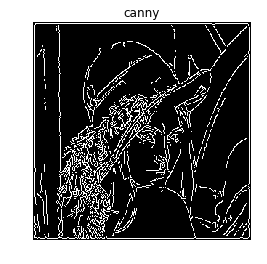

In [49]:
#gauss = cv2.GaussianBlur(grayImage,(3,3),0)
edge = cv.Canny(grayImage, 50, 150)  
plt.imshow(edge, cmap = "gray")
plt.axis("off")
plt.title("canny");
plt.show()

https://blog.csdn.net/ssw_1990/article/details/53213515 对原理有比较详细的解释